<a href="https://colab.research.google.com/github/ajay-1010/VisualTales-Image-Caption-Generator/blob/main/Pizza_vs_Non_Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  CNN Model for Pizza vs. Non-Pizza Classification**
# Objective

# Build a Convolutional Neural Network (CNN) model to classify images as either pizza or non-pizza using a dataset from Kaggle.



Importing Libraries

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torchvision


In [42]:
!unzip "/pizza.zip" -d /content/pizza3


Archive:  /pizza.zip
  inflating: /content/pizza3/pizza_not_pizza/food101_subset.py  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1005746.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1009225.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1012312.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1018802.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1020735.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1027142.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/102839.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1043233.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1045400.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/104773.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1050956.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1054362.jpg  
  inflating: /content/pizza3/pizza_not_pizza/not_pizza/1062097.jpg  
  inflating: /conte

Load dataset from the uploaded path

In [46]:

dataset = datasets.ImageFolder('/content/pizza3/', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Define the CNN model

In [47]:
class PizzaCNN(nn.Module):
    def __init__(self):
        super(PizzaCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 30 * 30, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 30 * 30)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = PizzaCNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.0
Epoch 2, Loss: 0.0
Epoch 3, Loss: 0.0
Epoch 4, Loss: 0.0
Epoch 5, Loss: 0.0
Epoch 6, Loss: 0.0
Epoch 7, Loss: 0.0
Epoch 8, Loss: 0.0
Epoch 9, Loss: 0.0
Epoch 10, Loss: 0.0



 Testing loop

In [48]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 100.0%


Visualization

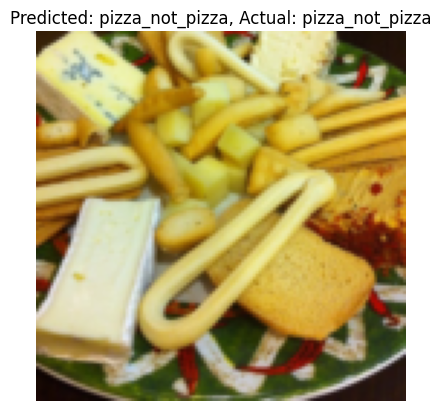

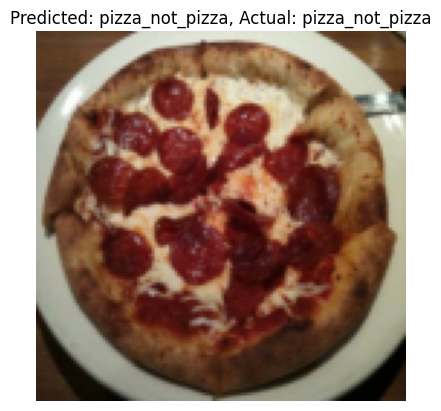

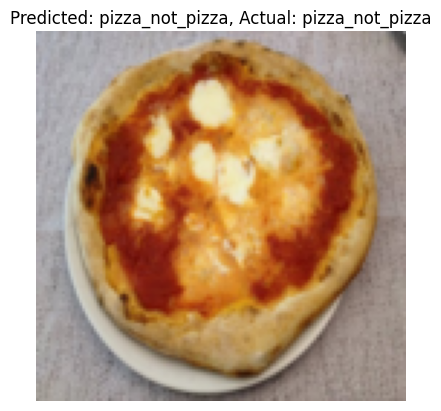

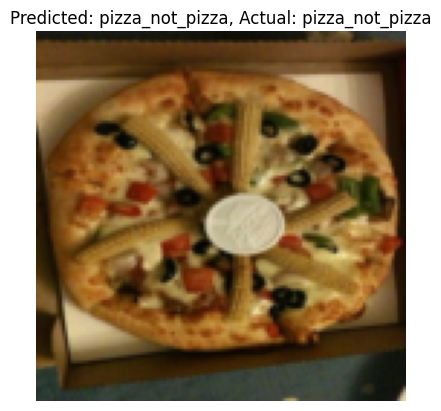

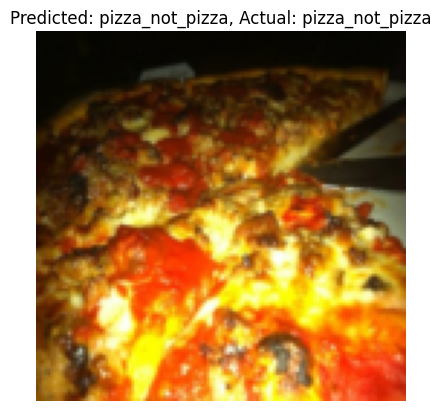

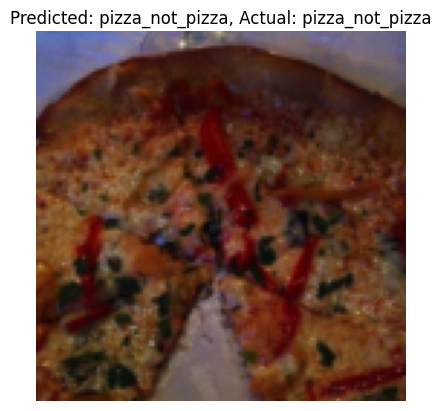

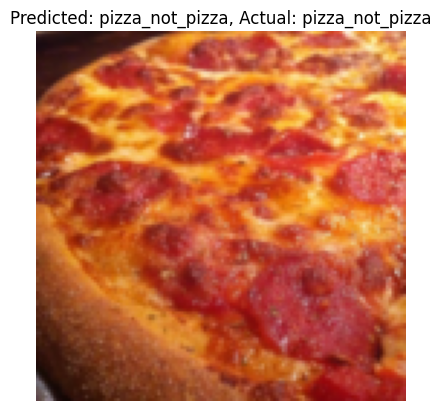

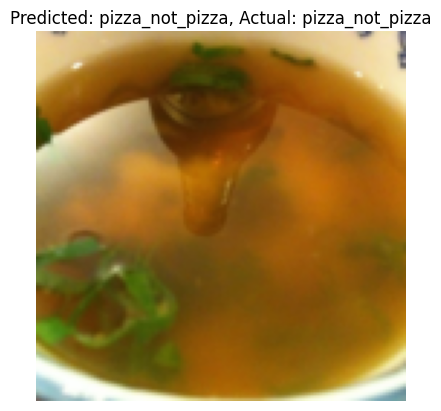

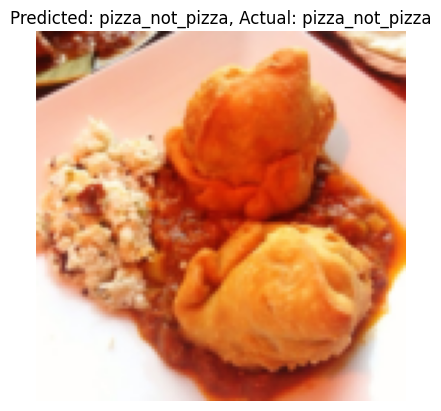

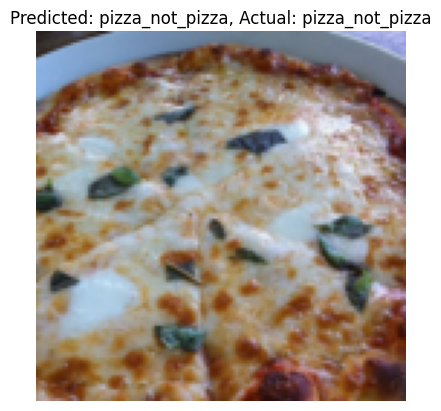

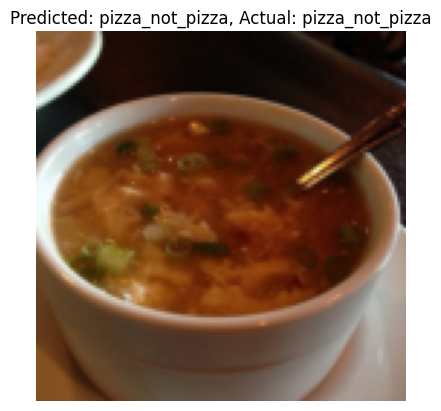

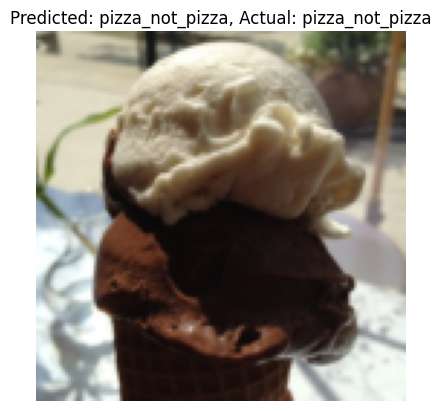

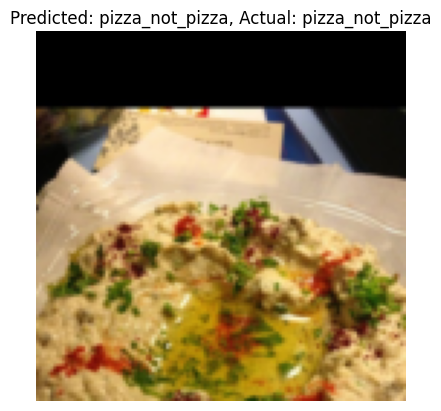

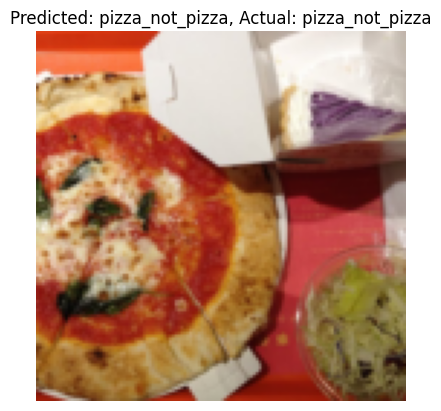

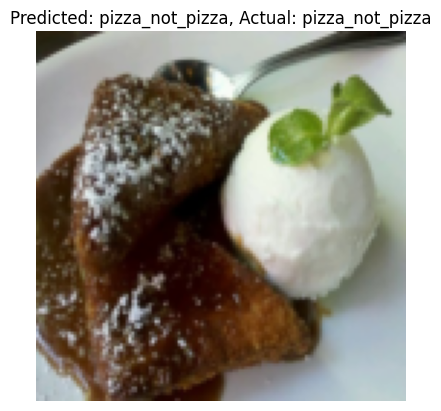

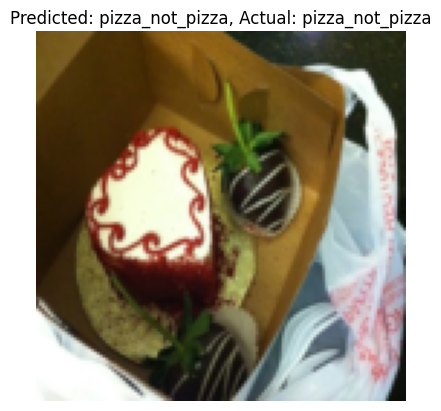

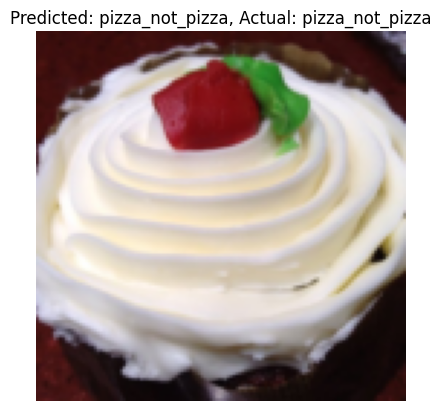

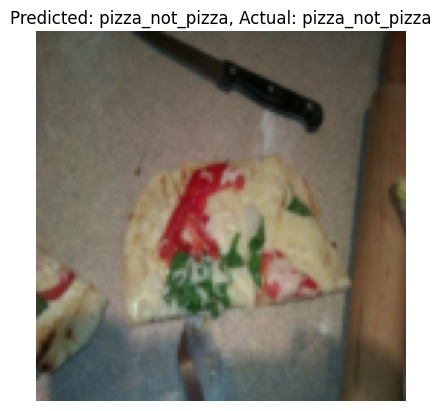

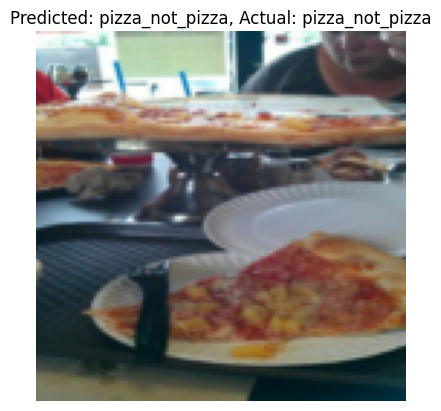

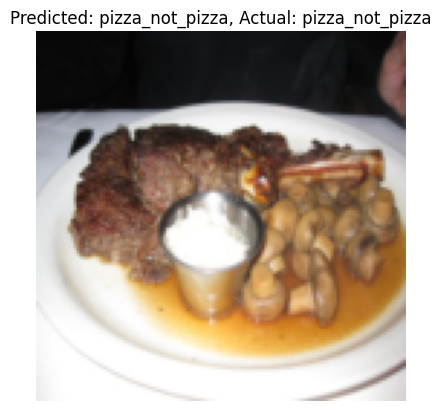

In [54]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

# Function to show a single image
def show_image(image, predicted_label, actual_label):
    image = to_pil_image(image)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
    plt.axis('off')
    plt.show()
    plt.pause(1)  # Pause for 1 second

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Prepare the labels
predicted_labels = [dataset.classes[predicted[i].item()] for i in range(20)]
actual_labels = [dataset.classes[labels[i].item()] for i in range(20)]

# Display the first 20 images with predictions and actual labels
for i in range(20):
    show_image(images[i], predicted_labels[i], actual_labels[i])
